In [94]:
import pandas as pd
import numpy as np
from pandas import datetime
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [2]:
sales = pd.read_csv("sales-cars.csv")

In [3]:
sales.head()

,Month,Sales
0,2016-01,266
1,2016-02,146
2,2016-03,183
3,2016-04,119
4,2016-05,180


In [60]:
sales.shape

(36, 1)

In [4]:
sales.Month[1]

'2016-02'

In [5]:
sales = pd.read_csv("sales-cars.csv", parse_dates=["Month"])

In [6]:
sales.Month[1]

Timestamp('2016-02-01 00:00:00')

In [7]:
sales.head()

,Month,Sales
0,2016-01-01,266
1,2016-02-01,146
2,2016-03-01,183
3,2016-04-01,119
4,2016-05-01,180


In [8]:
sales = pd.read_csv("sales-cars.csv", index_col=0 , parse_dates=["Month"])
sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


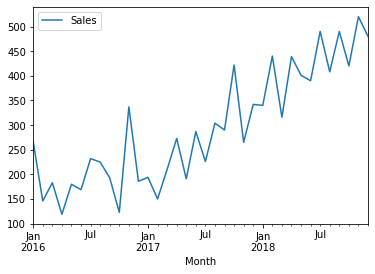

In [9]:
# Visual is the first way to check Stationarity
sales.plot()

In [10]:
# ACF (Autocorrelatioin Fucntion) is the second way to check Stationarity
from statsmodels.graphics.tsaplots import plot_acf

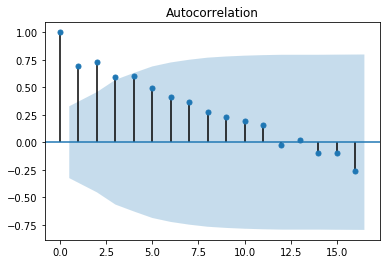

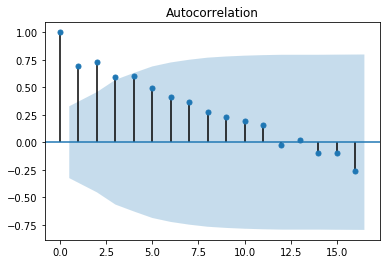

In [11]:
plot_acf(sales)

In [62]:
# Rolling Mean and SD is the third way to check Stationarity
# Determing rolling statistics mean
rolmean = sales.rolling(window=12).mean()

# Determing rolling statistics stardard deviation
rolstd = sales.rolling(window=12).std()
print(rolmean, rolstd)

                 Sales
Month                 
2016-01-01         NaN
2016-02-01         NaN
2016-03-01         NaN
2016-04-01         NaN
2016-05-01         NaN
2016-06-01         NaN
2016-07-01         NaN
2016-08-01         NaN
2016-09-01         NaN
2016-10-01         NaN
2016-11-01         NaN
2016-12-01  196.583333
2017-01-01  190.583333
2017-02-01  190.916667
2017-03-01  193.166667
2017-04-01  206.000000
2017-05-01  206.916667
2017-06-01  216.750000
2017-07-01  216.250000
2017-08-01  222.833333
2017-09-01  230.916667
2017-10-01  255.833333
2017-11-01  249.833333
2017-12-01  262.833333
2018-01-01  275.000000
2018-02-01  299.166667
2018-03-01  308.000000
2018-04-01  321.833333
2018-05-01  339.333333
2018-06-01  347.916667
2018-07-01  369.916667
2018-08-01  378.583333
2018-09-01  395.250000
2018-10-01  395.083333
2018-11-01  416.333333
2018-12-01  427.833333                 Sales
Month                
2016-01-01        NaN
2016-02-01        NaN
2016-03-01        NaN
2016-04-01      

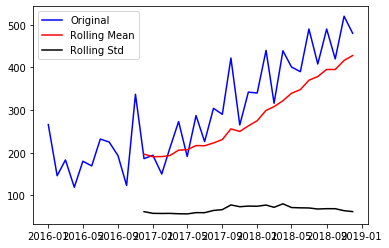

In [75]:
# Plot all three data, 1. Original Data 2. Rolling Mean 3. Rolling SD
plt.plot(sales, color='blue', label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')

In [68]:
sales.Sales.head()

Month
2016-01-01    266
2016-02-01    146
2016-03-01    183
2016-04-01    119
2016-05-01    180
Name: Sales, dtype: int64

In [72]:
# Perform Dickey Fuller test:
# Adfuller is the forth way to check Stationarity
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales['Sales'], autolag ='AIC')
dftest


Results of Dickey-Fuller Test:


(1.6368831572690297,
 0.9979641164504948,
 10,
 25,
 {'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328004},
 271.6015419285087)

In [74]:
dfoutput = pd.Series(dftest[0:4], index=['Test Statistice','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s) '%key] = value
    
dfoutput    


Test Statistice                 1.636883
p-value                         0.997964
#Lags Used                     10.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64

## Stationary
means mean, variance and covariance is constant over periods.

### Converity series to stationary


In [12]:
sales.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


In [13]:
sales_diff = sales.diff(periods=1)# NaN, 146-266, 183-146
# One of the parameter of ARIMA Model periods = 1
sales_diff.head()

,Sales
Month,
2016-01-01,NaN
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0


In [14]:
sales_diff = sales_diff[1:]
sales_diff.head()

,Sales
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0


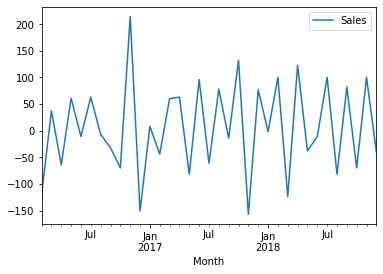

In [15]:
sales_diff.plot()

In [76]:
# Rolling Mean and SD is the third way to check Stationarity
# Determing rolling statistics mean
rolmean = sales_diff.rolling(window=12).mean()

# Determing rolling statistics stardard deviation
rolstd = sales_diff.rolling(window=12).std()
print(rolmean, rolstd)

                Sales
Month                
2016-02-01        NaN
2016-03-01        NaN
2016-04-01        NaN
2016-05-01        NaN
2016-06-01        NaN
2016-07-01        NaN
2016-08-01        NaN
2016-09-01        NaN
2016-10-01        NaN
2016-11-01        NaN
2016-12-01        NaN
2017-01-01  -6.000000
2017-02-01   0.333333
2017-03-01   2.250000
2017-04-01  12.833333
2017-05-01   0.916667
2017-06-01   9.833333
2017-07-01  -0.500000
2017-08-01   6.583333
2017-09-01   8.083333
2017-10-01  24.916667
2017-11-01  -6.000000
2017-12-01  13.000000
2018-01-01  12.166667
2018-02-01  24.166667
2018-03-01   8.833333
2018-04-01  13.833333
2018-05-01  17.500000
2018-06-01   8.583333
2018-07-01  22.000000
2018-08-01   8.666667
2018-09-01  16.666667
2018-10-01  -0.166667
2018-11-01  21.250000
2018-12-01  11.500000                  Sales
Month                 
2016-02-01         NaN
2016-03-01         NaN
2016-04-01         NaN
2016-05-01         NaN
2016-06-01         NaN
2016-07-01         NaN
20

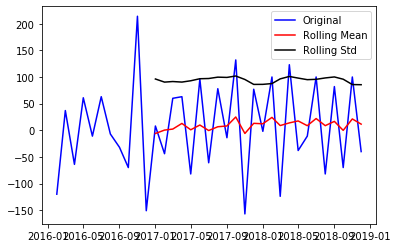

In [77]:
# Plot all three data, 1. Original Data 2. Rolling Mean 3. Rolling SD
plt.plot(sales_diff, color='blue', label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')

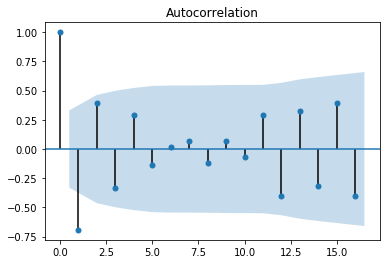

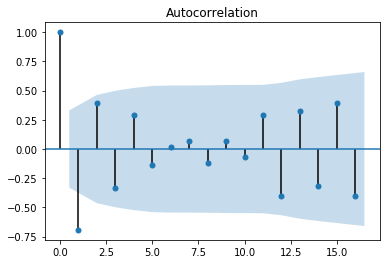

In [16]:
plot_acf(sales_diff)

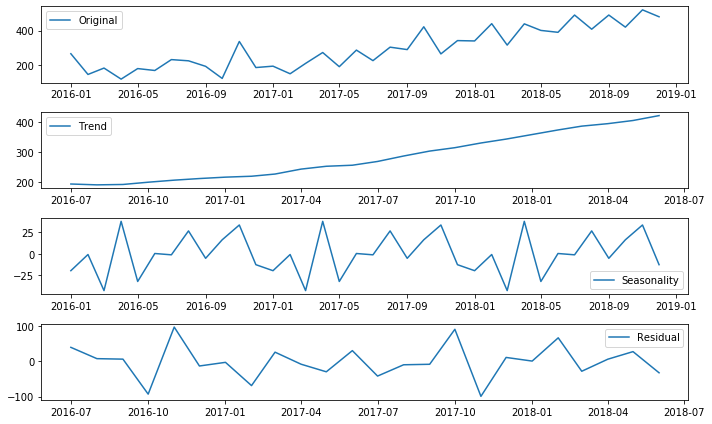

In [88]:
# Time Series Component
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(sales)

trend = decompose.trend
seasonal = decompose.seasonal
residual = decompose.resid

plt.subplot(411)
plt.plot(sales, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')

plt.tight_layout()

In [78]:
X = sales_diff.values
X.size

35

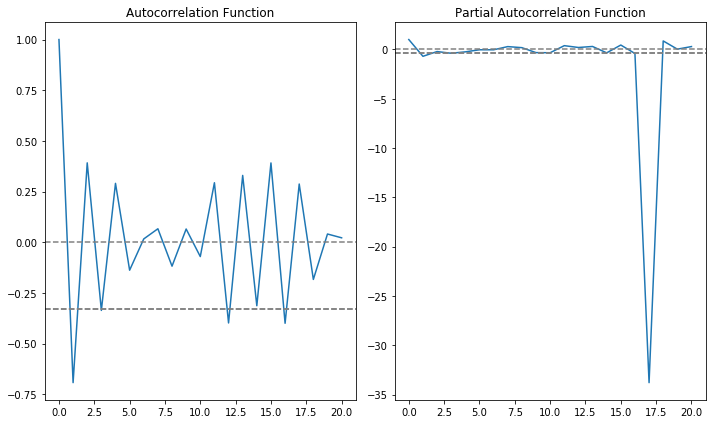

In [96]:
# We found out d value
# Now try to find 
# acf (Auto correlation function) for q
# pacf(Partial ACF) for p 

from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(sales_diff, nlags = 20)
lag_pacf = pacf(sales_diff, nlags=20, method='ols') # Ordinary Least Square Method

# Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--', color='grey')
plt.axhline(y=-1.96/np.sqrt(len(sales_diff)),linestyle='--', color='grey')
plt.axhline(y=-1.96/np.sqrt(len(sales_diff)),linestyle='--', color='grey')
plt.title('Autocorrelation Function')

# Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--', color='grey')
plt.axhline(y=-1.96/np.sqrt(len(sales_diff)),linestyle='--', color='grey')
plt.axhline(y=-1.96/np.sqrt(len(sales_diff)),linestyle='--', color='grey')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


Plotting AR MODEL


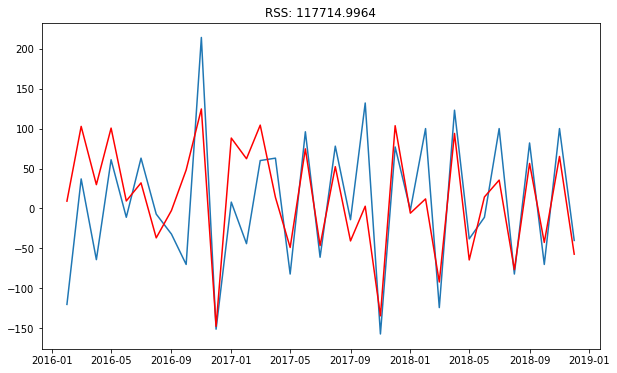

In [103]:
# Obser first time dropped 
# ACF value should be 1
# PACF value should be 1
# We got all these value from data after period

# Now apply ARIMA on actual data with these parametter

from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(sales, order=(1,1,1))
model_arima = model.fit(disp=-1)
plt.plot(sales_diff)
plt.plot(model_arima.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((model_arima.fittedvalues - sales_diff['Sales'])**2))
print('Plotting AR MODEL')

In [19]:
train = X[0:27] # 75% 27 train data
test = X[27:] # 9 data as test data

In [20]:
train.size

27

In [21]:
predictions = []

In [22]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [23]:
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [24]:
predictions = model_ar_fit.predict(start=27, end=36)

In [25]:
test

array([[439.],
       [401.],
       [390.],
       [490.],
       [408.],
       [490.],
       [420.],
       [520.],
       [480.]], dtype=float32)

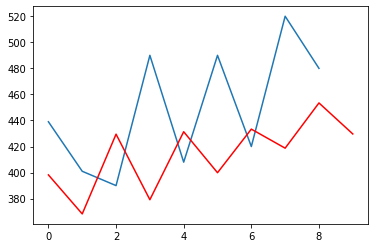

In [26]:
plt.plot(test)
plt.plot(predictions, color='red')

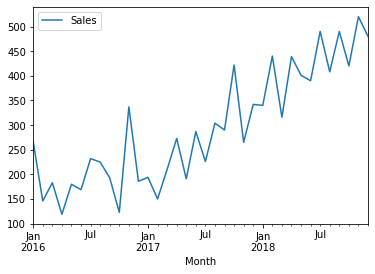

In [27]:
sales.plot()

# ARIMA Model

In [28]:
from statsmodels.tsa.arima_model import ARIMA

In [35]:
# p, d, q
# P = periods taken for autogression model
# d = Integrated Order, how many time differntial done
# q number of periods in moving average model
model_arima = ARIMA(train, order=(3,1,1)) # p=1,d=1 and q=1

In [36]:
model_arima_fit = model_arima.fit()
model_arima_fit.aic

295.9979353418612

In [37]:
predictions = model_arima_fit.forecast(steps=9)[0]
predictions

array([388.10768153, 361.88638003, 431.54609927, 377.90925848,
       418.71352972, 398.84046379, 442.34753967, 420.19652087,
       447.08625411])

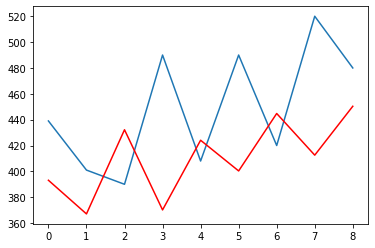

In [32]:
plt.plot(test)
plt.plot(predictions,color='red')

In [50]:
import itertools
p=d=q=range(0,5)
pdq =list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [55]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train, order=param)
        model_arima_fit = model_arima.fit()
        print(param, model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 319.45285852307086
(0, 0, 1) 318.7244809384947
(0, 0, 2) 315.2506002896649
(0, 0, 3) 316.38342265642257
(0, 0, 4) nan
(0, 1, 0) 311.8293983488534
(0, 1, 1) 296.0841530678005
(0, 1, 2) 296.3229226907689
(0, 2, 0) 329.1834958250828
(0, 2, 1) 306.1019469685257
(1, 0, 0) 316.1668717534279
(1, 0, 1) 313.0487174406702
(1, 0, 2) 310.9790642275034
(1, 1, 0) 298.8325442271006
(1, 1, 1) 297.12565112585196
(1, 1, 2) 299.47166670629457
(1, 1, 3) 301.28511809480204
(1, 2, 0) 306.53077675708374
(2, 0, 0) 310.9969573612191
(2, 0, 1) 342.5246358294303
(2, 1, 0) 300.20895612399573
(2, 1, 1) 297.99999301674006
(2, 1, 2) 298.55054281302245
(2, 1, 3) 302.87208388612163
(2, 2, 0) 306.2975856431866
(3, 0, 0) 312.9838587473828
(3, 0, 1) 336.078521041164
(3, 1, 0) 294.85435842186024
(3, 1, 1) 295.9979353418612
(3, 1, 2) 292.66862386939545
(3, 1, 3) 294.6588907518689
(3, 2, 0) 299.40758681554314
(4, 0, 0) 311.0706562039329
(4, 0, 1) 321.8309391983909
(4, 1, 0) 295.93436313519135
(4, 1, 1) 297.9098817

In [ ]:
#https://www.youtube.com/watch?v=D9y6dcy0xK8

In [ ]:
# Lowest value (4, 2, 1) 291.39913447175024, hence try 4,2,1 in ARIMA

In [56]:
model_arima = ARIMA(train, order=(4,2,1)) # p=1,d=1 and q=1
model_arima_fit = model_arima.fit()
predictions = model_arima_fit.forecast(steps=9)[0]

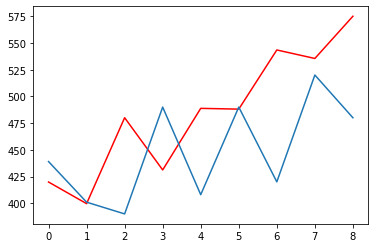

In [57]:
plt.plot(predictions, color='red')
plt.plot(test)

In [58]:
mean_squared_error(test, predictions)

4775.633962395447